In [24]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np
import pandas as pd
import keras
import sklearn
from sklearn import linear_model, decomposition
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

In [25]:
(X_tr, y_tr), (X_t, y_t) = keras.datasets.mnist.load_data()
X_full = np.concatenate((X_tr, X_t), axis=0).reshape((70000, 784))
y_full = np.concatenate((y_tr, y_t), axis=0)

def prepare_dataset(n, CLASS1, CLASS2, X_full=X_full, y_full=y_full):
    X_filtered = X_full[(y_full == CLASS1) | (y_full == CLASS2)][:n]
    y_filtered = y_full[(y_full == CLASS1) | (y_full == CLASS2)][:n]
    return train_test_split(X_filtered, y_filtered, train_size=0.5)


def plot_scores(reg, train_scores, test_scores):
    print(max(zip(test_scores, reg), key=lambda x: x[0]))
    fig, ax = plt.subplots()
    ax.plot(reg, train_scores, color='r', label='train')
    ax.plot(reg, test_scores, color='g', label='test')
    ax.set(xlabel='log C', ylabel='score')
    ax.grid()
    ax.legend()


def plot_coef(model):
    plt.imshow(model.coef_[0].reshape((28, 28))*-1, cmap='Greys')

(0.946, -2)


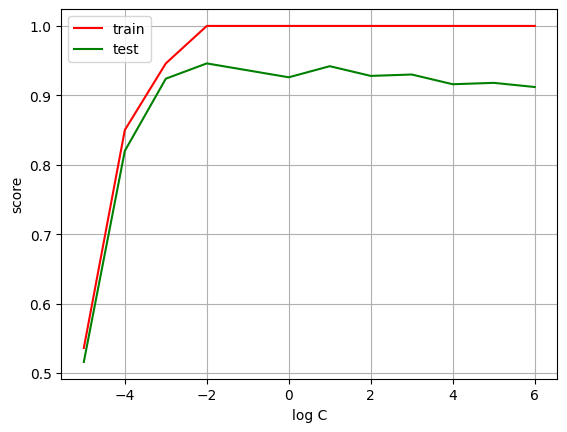

In [38]:
X_train, X_test, y_train, y_test = prepare_dataset(1000, 7, 9)

REGS = range(-5, 7)
TRAIN = []
TEST = []
for REG in REGS:
    model = sklearn.linear_model.LogisticRegression(penalty='l1', solver='liblinear', C=10**REG)
    model.fit(X_train, y_train)
    TRAIN.append(model.score(X_train, y_train))
    TEST.append(model.score(X_test, y_test))

plot_scores(REGS, TRAIN, TEST)

(0.964, -5)


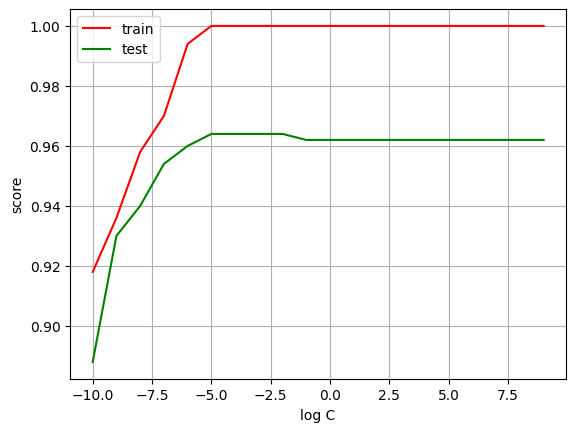

In [41]:
X_train, X_test, y_train, y_test = prepare_dataset(1000, 8, 9)

REGS = range(-10, 10)
TRAIN = []
TEST = []
for REG in REGS:
    model = sklearn.linear_model.LogisticRegression(penalty='l2', solver='liblinear', C=10**REG)
    model.fit(X_train, y_train)
    TRAIN.append(model.score(X_train, y_train))
    TEST.append(model.score(X_test, y_test))

plot_scores(REGS, TRAIN, TEST)

(0.97, -2)


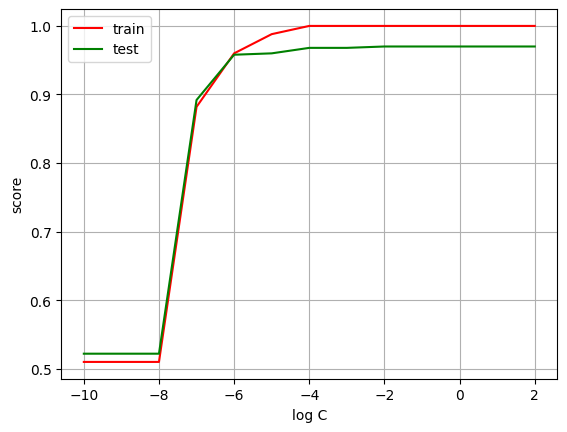

In [28]:
X_train, X_test, y_train, y_test = prepare_dataset(1000, 8, 9)

REGS = range(-10, 3)
TRAIN = []
TEST = []
for REG in REGS[::-1]:
    model = sklearn.linear_model.Perceptron(penalty='l2', alpha=10**REG)
    model.fit(X_train, y_train)
    TRAIN.append(model.score(X_train, y_train))
    TEST.append(model.score(X_test, y_test))

plot_scores(REGS, TRAIN, TEST)

(0.962, -5)


/media/danz/data/dev/ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=4.82774e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/media/danz/data/dev/ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=2.94604e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/media/danz/data/dev/ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=2.80327e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


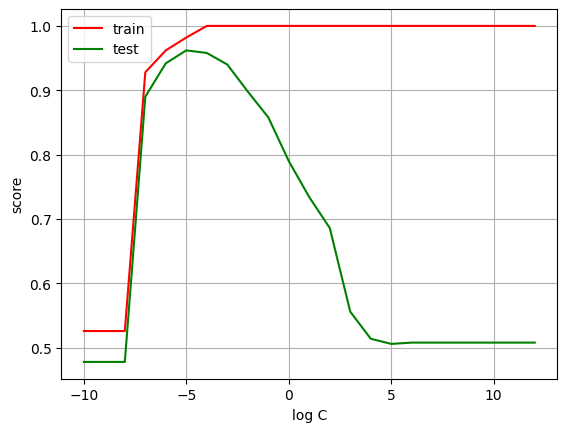

In [45]:
X_train, X_test, y_train, y_test = prepare_dataset(1000, 3, 9)

REGS = range(-10, 13)
TRAIN = []
TEST = []
for REG in REGS[::-1]:
    model = sklearn.linear_model.RidgeClassifier(alpha=10**REG)
    model.fit(X_train, y_train)
    TRAIN.append(model.score(X_train, y_train))
    TEST.append(model.score(X_test, y_test))

plot_scores(REGS, TRAIN, TEST)